In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

from utils import run_exp_strategy

In [ ]:
r = run_exp_strategy.RunExpStrategy()
r.total_timesteps = 200000
r.exp_id = 3
r.start_date = "20090101"
r.end_date = "20241122"
r.split_date = "20240901"
r.a_stock_list = "SSE_50"
r.h_stock_list = ""
r.usa_stock_list = ""
r.baseline_stocks = "SSE_50_INDEX"
r.no_tushare = True
r.rerun_test = False
r.create_exp_dir()
r.download_stock_data()
r.download_baseline_stocks()
r.split_train_and_test_data()
r.train_model()
r.test_model()
backtest_table, backtest_curve = r.plot_test_result()

,a2c,ddpg,ppo,sac,td3,baseline
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000451,-0.000413,-0.000101,-0.000414,-0.000413,-0.005718
2,-0.001052,-0.001197,-0.001176,-0.001607,-0.001197,-0.013464
3,-0.000353,0.000195,-0.000892,-0.000531,0.000195,-0.013847
4,-0.007126,-0.027789,-0.005617,-0.011187,-0.027789,-0.015591
5,-0.010006,-0.031643,-0.007869,-0.017813,-0.031643,-0.031551
6,-0.010502,-0.031469,-0.007761,-0.019095,-0.031469,-0.032735
7,-0.011337,-0.032799,-0.008657,-0.021234,-0.032799,-0.037119
8,-0.010977,-0.032522,-0.008419,-0.020742,-0.032522,-0.039544
9,-0.010976,-0.033736,-0.008503,-0.020929,-0.033736,-0.041016


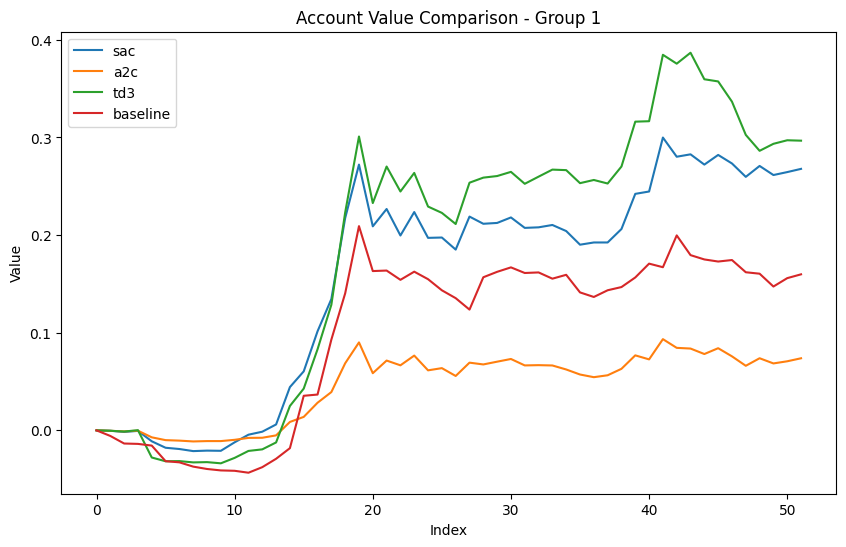

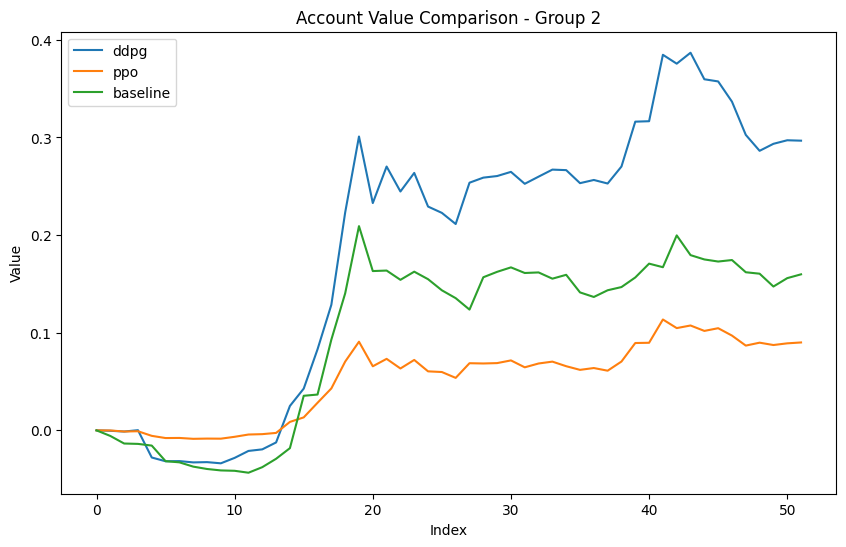

In [56]:

# 获取除baseline外的5条曲线名称
curves = [col for col in backtest_curve.columns if col!= 'baseline']
# 随机打乱这5条曲线的顺序
import random
random.shuffle(curves)

# 分组
group1 = curves[0:3]
group2 = curves[3:5]

# 绘制第一组图表
plt.figure(figsize=(10, 6))
for col in group1 + ['baseline']:
    plt.plot(backtest_curve.index, backtest_curve[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Account Value Comparison - Group 1')
plt.legend()
plt.show()

# 绘制第二组图表
plt.figure(figsize=(10, 6))
for col in group2 + ['baseline']:
    plt.plot(backtest_curve.index, backtest_curve[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Account Value Comparison - Group 2')
plt.legend()
plt.show()

In [57]:
df = pd.DataFrame(backtest_table).T
df

,累计收益率,最大回撤率,年化收益率,年化波动率,Sharpe比率,Omega比率
baseline,13.15%,-7.07%,79.95%,28.80%,277.55%,158.08%
a2c,7.38%,-3.27%,41.23%,14.53%,283.71%,158.27%
ddpg,29.67%,-7.24%,252.20%,37.19%,678.09%,207.53%
ppo,9.00%,-3.40%,51.85%,13.77%,376.63%,182.22%
sac,26.78%,-6.84%,215.78%,31.10%,693.81%,220.03%
td3,29.67%,-7.24%,252.20%,37.19%,678.09%,207.53%
